In [2]:
%matplotlib inline
import sys
from datetime import datetime as dt

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE

sys.path.append('../')
from util.feature import add_feature

sns.set(style='white')
plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号

In [12]:
train_data = pd.read_csv('../data/d_train_20180102.csv')
test_data = pd.read_csv('../data/d_test_A_20180102.csv')
test_data['血糖'] = -1
data = pd.concat([train_data, test_data], ignore_index=True)
data.loc[data['性别'] == '男', :] = data.loc[data['性别'] == '男', :].fillna(data.loc[data['性别'] == '男', :].median())
data.loc[data['性别'] == '女', :] = data.loc[data['性别'] == '女', :].fillna(data.loc[data['性别'] == '女', :].median())
data['体检日期'] = pd.to_datetime(train_data['体检日期'], format='%d/%m/%Y')
data = add_feature(data)
train_data = add_feature(train_data)

In [17]:
train_data.describe()

,id,性别,年龄,*天门冬氨酸氨基转换酶,*丙氨酸氨基转换酶,*碱性磷酸酶,*r-谷氨酰基转换酶,*总蛋白,白蛋白,*球蛋白,...,白蛋白/总蛋白,球蛋白/总蛋白,甘油三酯/总胆固醇,高低固醇比例,尿素酸比例,白红细胞比例,嗜碱酸细胞比例,年龄段,eGFR,GFR
count,5642.000000,5642.000000,5642.000000,4421.000000,4421.00000,4421.000000,4421.000000,4421.000000,4421.000000,4421.000000,...,4421.000000,4421.000000,4423.000000,4423.000000,4264.000000,5626.000000,5626.000000,5642.000000,4264.000000,4264.000000
mean,2866.184155,0.490252,45.580468,26.805892,27.65202,87.482278,38.823762,76.771108,45.822504,30.948604,...,0.597624,0.402376,0.347173,0.444155,0.014841,1.335368,0.552668,8.713931,4.872238,0.475952
std,1655.555649,0.499949,12.961946,13.563003,22.61152,25.630897,40.788282,4.016055,2.617401,3.565997,...,0.032928,0.032928,0.271323,0.176758,0.005038,0.322380,2.279626,2.605487,0.634935,0.076222
min,1.000000,0.000000,3.000000,10.040000,0.12000,22.980000,6.360000,57.320000,29.540000,7.060000,...,0.340902,0.123168,0.055672,0.133333,0.003372,0.574642,0.000000,0.000000,3.239603,0.177391
25%,1433.250000,0.000000,35.000000,20.250000,15.13000,70.370000,17.810000,74.190000,44.130000,28.570000,...,0.576241,0.380952,0.195273,0.325513,0.011296,1.108065,0.214286,7.000000,4.399270,0.427313
50%,2870.500000,0.000000,45.000000,23.890000,21.48000,84.470000,26.190000,76.630000,45.820000,30.780000,...,0.598099,0.401901,0.276956,0.397993,0.014041,1.291915,0.333333,9.000000,4.866957,0.474735
75%,4302.750000,1.000000,54.000000,29.270000,32.30000,100.210000,43.850000,79.530000,47.570000,33.180000,...,0.619048,0.423759,0.411271,0.518462,0.017465,1.514737,0.565217,10.000000,5.365677,0.521463
max,5732.000000,1.000000,93.000000,434.950000,498.89000,374.320000,736.990000,100.410000,54.080000,66.180000,...,0.876832,0.659098,4.942925,3.446429,0.047116,4.378378,100.000000,18.000000,6.303345,1.476078


In [18]:
test_data.describe()

,id,年龄,*天门冬氨酸氨基转换酶,*丙氨酸氨基转换酶,*碱性磷酸酶,*r-谷氨酰基转换酶,*总蛋白,白蛋白,*球蛋白,白球比例,...,血小板计数,血小板平均体积,血小板体积分布宽度,血小板比积,中性粒细胞%,淋巴细胞%,单核细胞%,嗜酸细胞%,嗜碱细胞%,血糖
count,1000.000000,1000.00000,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,...,995.000000,994.000000,994.00000,994.000000,995.000000,995.000000,995.000000,995.000000,995.000000,1000.0
mean,6248.701000,47.09600,26.697951,27.237791,88.009178,38.366736,77.151178,46.054429,31.096748,1.500663,...,248.589950,10.417304,13.76167,0.258102,56.855176,33.812663,6.780905,1.945327,0.612060,-1.0
std,299.619678,12.97448,11.024154,20.525946,25.473099,44.984867,4.067246,2.480063,3.523728,0.194114,...,67.471618,1.155695,2.38579,0.075052,8.118846,7.593783,1.505175,1.640087,0.309727,0.0
min,5733.000000,16.00000,13.110000,6.690000,26.510000,7.260000,64.130000,35.600000,20.240000,0.750000,...,62.000000,6.700000,8.80000,0.058000,31.900000,10.700000,1.300000,0.000000,0.000000,-1.0
25%,5987.750000,37.00000,20.375000,15.175000,69.570000,17.605000,74.510000,44.370000,28.760000,1.370000,...,207.000000,9.800000,11.90000,0.210000,51.600000,28.700000,5.700000,0.900000,0.400000,-1.0
50%,6246.500000,47.00000,23.960000,21.150000,85.740000,25.680000,77.050000,45.970000,31.030000,1.490000,...,243.000000,10.400000,13.30000,0.250000,56.800000,33.500000,6.700000,1.500000,0.600000,-1.0
75%,6507.250000,56.00000,29.105000,31.625000,101.920000,42.805000,79.850000,47.690000,33.175000,1.620000,...,282.000000,11.100000,16.00000,0.300000,62.300000,39.000000,7.700000,2.500000,0.700000,-1.0
max,6768.000000,84.00000,98.930000,171.890000,234.200000,626.890000,95.340000,53.550000,49.860000,2.310000,...,1271.000000,14.400000,23.50000,1.520000,81.300000,59.400000,14.900000,19.100000,2.700000,-1.0


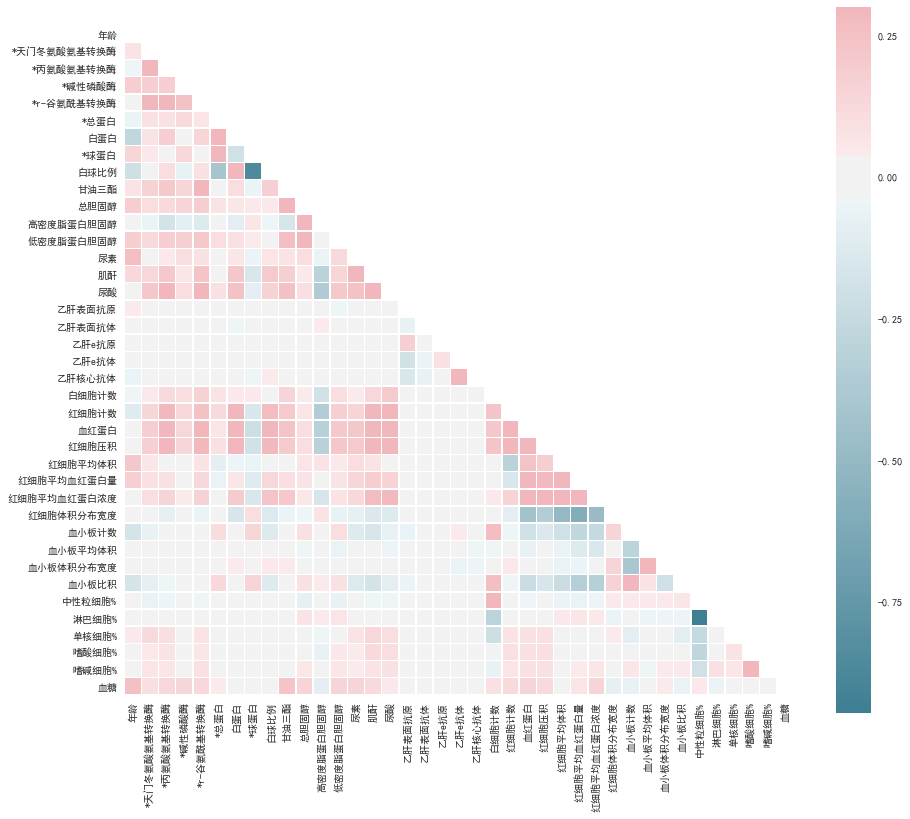

In [22]:
corr = train_data.loc[:, '年龄':].corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig_corr, ax_corr = plt.subplots(figsize=(15, 13))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
           square=True, linewidth=.5, ax=ax_corr)

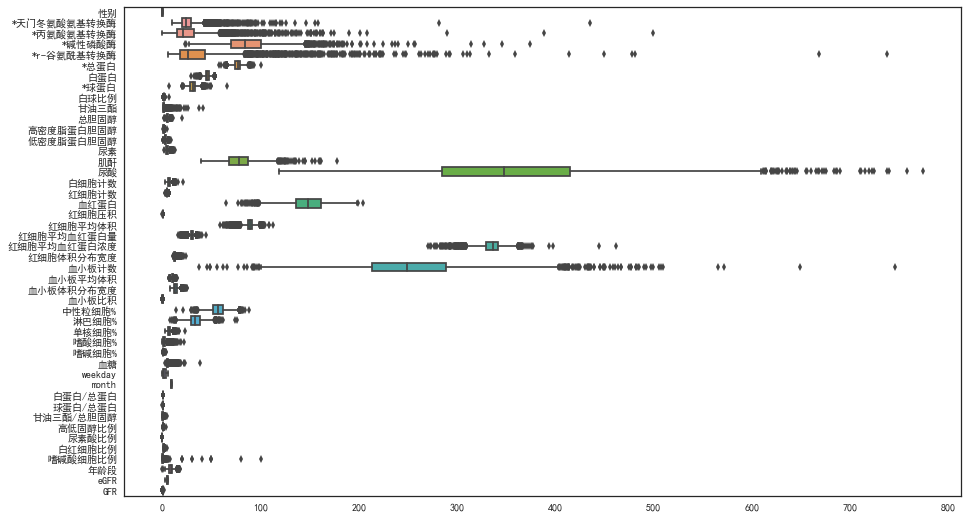

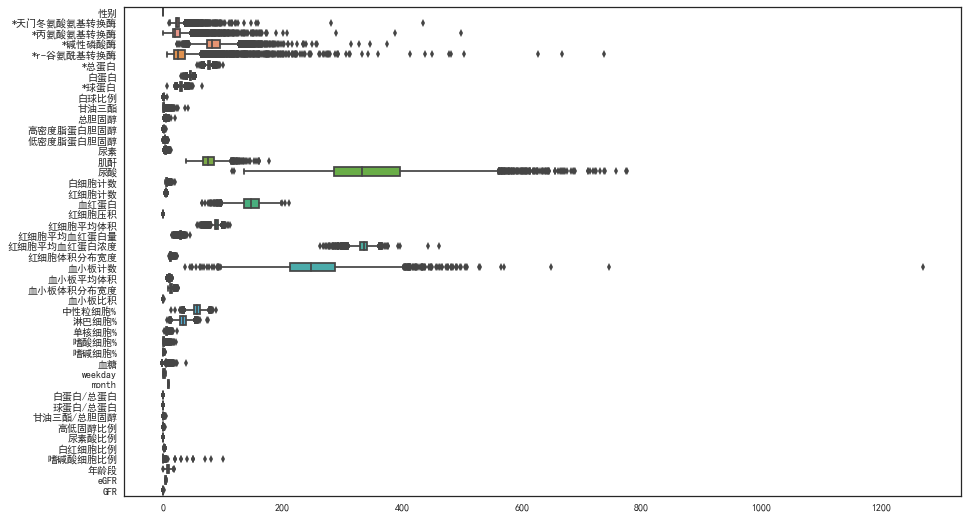

In [13]:
fig_boxt, ax_boxt = plt.subplots(figsize=(15, 9))
XTrain = train_data.loc[:, [column for column in train_data.columns if column not in 
                        ['id', '年龄', '体检日期', '乙肝表面抗原',
                         '乙肝表面抗体', '乙肝e抗原', '乙肝e抗体', '乙肝核心抗体',
                         'dayofyear']]]
sns.boxplot(data=XTrain, orient="h", ax=ax_boxt)

fig_boxa, ax_boxa = plt.subplots(figsize=(15, 9))
XALL = data.loc[:, [column for column in train_data.columns if column not in 
                    ['id', '年龄', '体检日期', '乙肝表面抗原',
                     '乙肝表面抗体', '乙肝e抗原', '乙肝e抗体', '乙肝核心抗体',
                     'dayofyear']]]
sns.boxplot(data=XALL, orient="h", ax=ax_boxa)

In [35]:
data = train_data.loc[train_data['性别'] == 0, [column for column in train_data.columns if column not in 
                        ['id', '年龄','性别', '血糖', '体检日期', '乙肝表面抗原',
                         '乙肝表面抗体', '乙肝e抗原', '乙肝e抗体', '乙肝核心抗体',
                         'dayofyear']]]
scaler = MinMaxScaler()
scaler.fit(data)
data = scaler.transform(data)

X_embedded = TSNE(n_components=2).fit_transform(data)

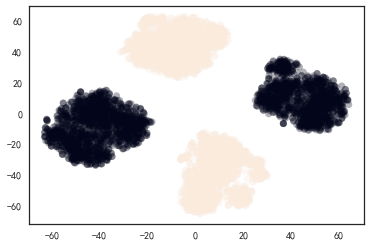

In [33]:
fig_embed, ax_embed = plt.subplots()
ax_embed.scatter(X_embedded[:, 0], X_embedded[:, 1], c=train_data['性别'], linewidths=0.01, alpha=0.3)

In [39]:
test = pd.read_csv('../data/d_test_A_20180102.csv')
test = add_feature(test)
test.fillna(test.median(), inplace=True)

,id,性别,年龄,体检日期,*天门冬氨酸氨基转换酶,*丙氨酸氨基转换酶,*碱性磷酸酶,*r-谷氨酰基转换酶,*总蛋白,白蛋白,...,白蛋白/总蛋白,球蛋白/总蛋白,甘油三酯/总胆固醇,高低固醇比例,尿素酸比例,白红细胞比例,嗜碱酸细胞比例,年龄段,eGFR,GFR
0,5733,0,54,2017-10-10,23.85,26.69,116.08,34.36,82.75,46.03,...,0.556254,0.443746,0.212724,0.478405,0.015097,1.900810,0.500000,10,5.051878,0.620293
1,5734,0,50,2017-10-10,29.75,34.98,90.07,111.43,71.90,44.09,...,0.613213,0.386787,0.450091,0.337017,0.015023,1.297945,0.156250,10,5.083844,0.439549
2,5735,0,27,2017-10-10,23.96,21.15,85.74,25.68,77.05,45.97,...,0.597749,0.402251,0.269366,0.402474,0.013414,1.583916,0.500000,5,6.031562,0.631262
3,5736,1,53,2017-10-10,17.98,16.63,95.95,23.41,78.16,45.44,...,0.581372,0.418628,0.873529,0.356589,0.012171,0.997831,0.571429,10,4.121083,0.419219
4,5739,1,43,2017-10-10,19.12,19.80,76.97,15.70,80.76,46.90,...,0.580733,0.419267,0.118780,0.652174,0.015978,1.350649,1.000000,8,4.400208,0.416362
5,5740,0,48,2017-10-10,25.77,17.66,92.06,26.01,72.29,45.45,...,0.628718,0.371282,0.164384,0.650909,0.018626,1.018443,0.666667,9,5.172487,0.474913
6,5741,1,49,2017-10-10,51.54,40.53,67.24,23.23,74.92,45.60,...,0.608649,0.391351,0.095791,0.251485,0.006427,0.877670,0.538462,9,4.256434,0.458836
7,5742,1,51,2017-10-10,26.51,24.77,87.71,26.60,70.31,44.39,...,0.631347,0.368653,0.243408,0.405488,0.011393,1.315895,0.545455,10,4.164206,0.400561
8,5743,1,68,2017-10-10,28.44,22.99,85.91,38.57,79.67,44.54,...,0.559056,0.440944,0.196248,0.439909,0.011509,1.926667,1.200000,13,3.756232,0.463274
9,5744,1,64,2017-10-10,35.65,29.05,114.98,202.29,78.08,44.58,...,0.570953,0.429047,0.302083,0.292632,0.015781,1.135496,0.583333,12,3.783736,0.341021


In [40]:
print(np.isinf(test.loc[:, '*天门冬氨酸氨基转换酶':]).any())

*天门冬氨酸氨基转换酶    False
*丙氨酸氨基转换酶      False
*碱性磷酸酶         False
*r-谷氨酰基转换酶     False
*总蛋白           False
白蛋白            False
*球蛋白           False
白球比例           False
甘油三酯           False
总胆固醇           False
高密度脂蛋白胆固醇      False
低密度脂蛋白胆固醇      False
尿素             False
肌酐             False
尿酸             False
乙肝表面抗原         False
乙肝表面抗体         False
乙肝e抗原          False
乙肝e抗体          False
乙肝核心抗体         False
白细胞计数          False
红细胞计数          False
血红蛋白           False
红细胞压积          False
红细胞平均体积        False
红细胞平均血红蛋白量     False
红细胞平均血红蛋白浓度    False
红细胞体积分布宽度      False
血小板计数          False
血小板平均体积        False
血小板体积分布宽度      False
血小板比积          False
中性粒细胞%         False
淋巴细胞%          False
单核细胞%          False
嗜酸细胞%          False
嗜碱细胞%          False
weekday        False
month          False
dayofyear      False
白蛋白/总蛋白        False
球蛋白/总蛋白        False
甘油三酯/总胆固醇      False
高低固醇比例         False
尿素酸比例          False
白红细胞比例         False
嗜碱酸细胞比例        False
年龄段          